In [1]:
import pandas as pd
import nltk
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
file_path = "C:/Users/hi/Downloads/amazon_vfl_reviews.csv"
df = pd.read_csv(file_path)
print(df.head())

         asin                                     name        date  rating  \
0  B07W7CTLD1  Mamaearth-Onion-Growth-Control-Redensyl  2019-09-06       1   
1  B07W7CTLD1  Mamaearth-Onion-Growth-Control-Redensyl  2019-08-14       5   
2  B07W7CTLD1  Mamaearth-Onion-Growth-Control-Redensyl  2019-10-19       1   
3  B07W7CTLD1  Mamaearth-Onion-Growth-Control-Redensyl  2019-09-16       1   
4  B07W7CTLD1  Mamaearth-Onion-Growth-Control-Redensyl  2019-08-18       5   

                                              review  
0  I bought this hair oil after viewing so many g...  
1  Used This Mama Earth Newly Launched Onion Oil ...  
2  So bad product...My hair falling increase too ...  
3  Product just smells similar to navarathna hair...  
4  I have been trying different onion oil for my ...  


In [3]:
if 'rating' in df.columns:
    def get_sentiment(rating):
        if rating >= 4:
            return 'positive'
        elif rating == 3:
            return 'neutral'
        else:
            return 'negative'

    df['sentiment'] = df['rating'].apply(get_sentiment)
else:
    print("Error: The dataset does not contain a 'rating' column to infer sentiment.")
    exit()

In [4]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [5]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Ensure all entries in 'review' are strings, and handle NaN values
df['review'] = df['review'].fillna('').astype(str)
df['cleaned_reviews'] = df['review'].apply(preprocess_text)
print(df.head())
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_reviews'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])

         asin                                     name        date  rating  \
0  B07W7CTLD1  Mamaearth-Onion-Growth-Control-Redensyl  2019-09-06       1   
1  B07W7CTLD1  Mamaearth-Onion-Growth-Control-Redensyl  2019-08-14       5   
2  B07W7CTLD1  Mamaearth-Onion-Growth-Control-Redensyl  2019-10-19       1   
3  B07W7CTLD1  Mamaearth-Onion-Growth-Control-Redensyl  2019-09-16       1   
4  B07W7CTLD1  Mamaearth-Onion-Growth-Control-Redensyl  2019-08-18       5   

                                              review sentiment  \
0  I bought this hair oil after viewing so many g...  negative   
1  Used This Mama Earth Newly Launched Onion Oil ...  positive   
2  So bad product...My hair falling increase too ...  negative   
3  Product just smells similar to navarathna hair...  negative   
4  I have been trying different onion oil for my ...  positive   

                                     cleaned_reviews  
0  bought hair oil viewing many good comments pro...  
1  used mama earth newly

In [6]:
# Naive Bayes Pipeline
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('nb', MultinomialNB())
])

# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('lr', LogisticRegression(max_iter=1000))
])

In [7]:
# Train and evaluate Naive Bayes
nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

# Train and evaluate Logistic Regression
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

In [8]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def vader_sentiment_analysis(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['review'].apply(vader_sentiment_analysis)

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


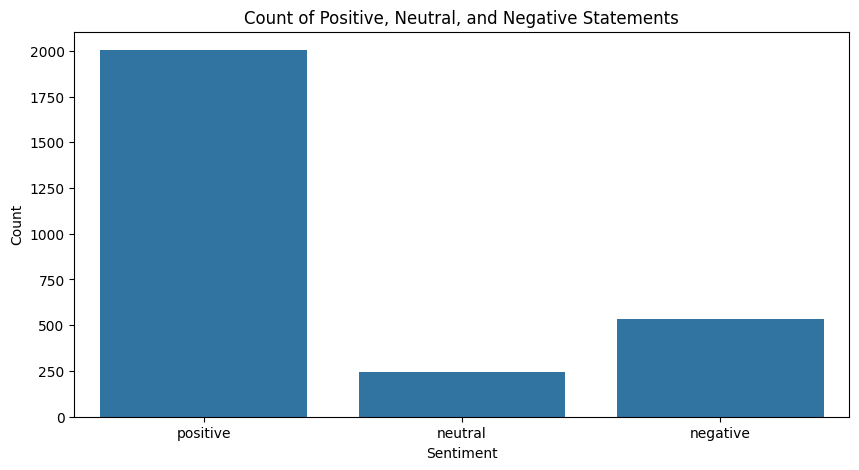

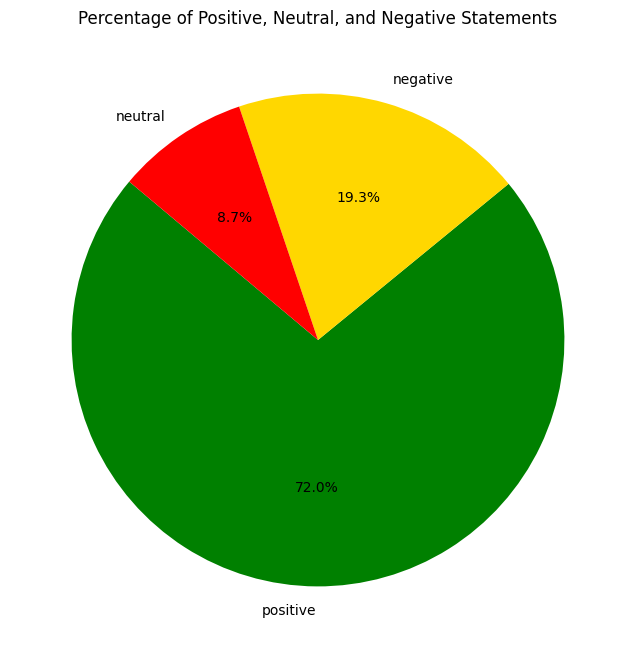

In [9]:
y_test_vader = df['sentiment']
y_pred_vader = df['vader_sentiment']

plt.figure(figsize=(10, 5))
sns.countplot(x='vader_sentiment', data=df, order=['positive', 'neutral', 'negative'])
plt.title('Count of Positive, Neutral, and Negative Statements')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plotting the percentages using a pie chart
sentiment_counts = df['vader_sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'gold', 'red'], startangle=140)
plt.title('Percentage of Positive, Neutral, and Negative Statements')
plt.show()

In [10]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\nVADER Classification Report:")
print(classification_report(y_test_vader, y_pred_vader))
print("VADER Accuracy:", accuracy_score(y_test_vader, y_pred_vader))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.48      0.65       135
     neutral       0.00      0.00      0.00        40
    positive       0.78      1.00      0.87       382

    accuracy                           0.80       557
   macro avg       0.59      0.49      0.51       557
weighted avg       0.77      0.80      0.76       557

Naive Bayes Accuracy: 0.8025134649910234

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.97      0.75      0.85       135
     neutral       1.00      0.03      0.05        40
    positive       0.85      1.00      0.92       382

    accuracy                           0.87       557
   macro avg       0.94      0.59      0.60       557
weighted avg       0.89      0.87      0.84       557

Logistic Regression Accuracy: 0.8689407540394973

VADER Classification Report:
              precision    recall  f1-s

c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

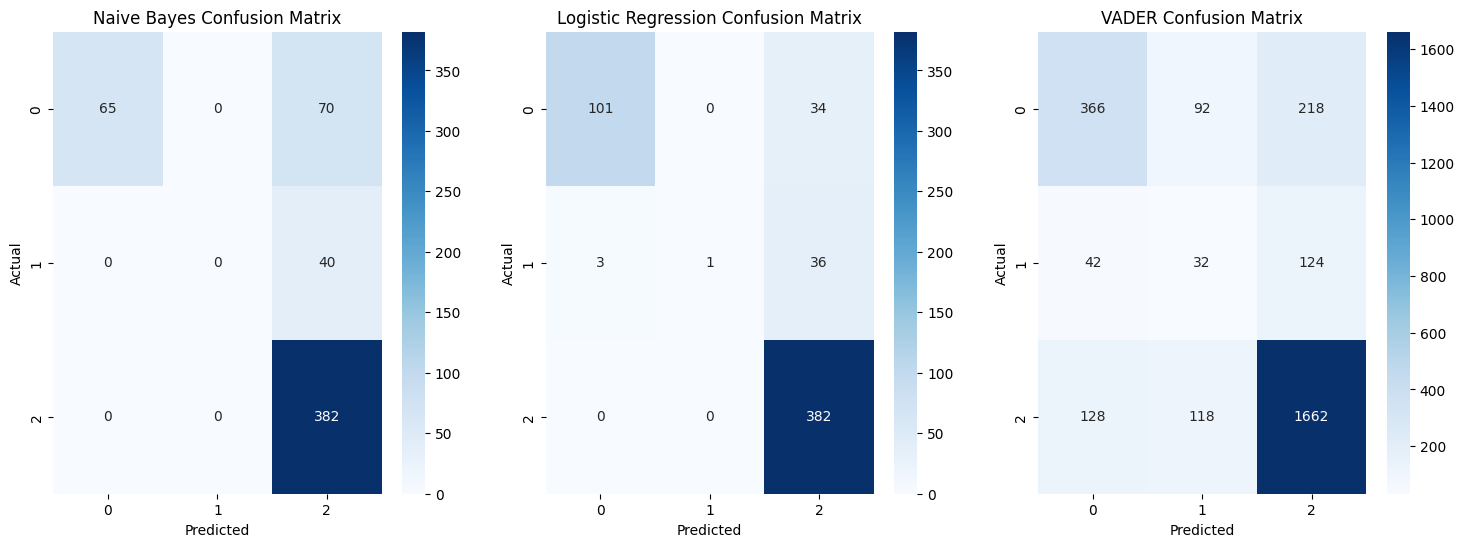

In [11]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_vader = confusion_matrix(y_test_vader, y_pred_vader)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Naive Bayes Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Logistic Regression Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(cm_vader, annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title('VADER Confusion Matrix')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

plt.show()